# Multidimensional Arrays - lecture notes

This lecture covers some of the basics of manipulating and operating on multidimensional data with `numpy`.

## The Memory Model of Arrays

### Storing numbers in computer memory
Before diving into arrays, it is useful to cover the underlying conceptual model of computer memory and how numbers are stored.

Computer memory can be visualized as a long, linear sequence of zeros and ones:
```
[ 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 ... ]
```

When you 'store' something in computer memory, what that means is that you encode the information as a series of binary values; you change part of the sequence of zeros and ones.

Every integer can be represented as a binary number, i.e.,:

| Integer       | Binary representation |
| ------------- | --------------------- |
| 0             | 0                     |
| 1             | 1                     |
| 2             | 10                    |
| ...           | ...                   |
| 354           | 101100010             |

And every number can be approximated by a set of integers, e.g., using scientific notation.  For example, in the number 1.524e26, can be represented by the integers [1, 524, 26] as long as we know that the first value is the integer to the left of the decimal, the second is the integer to the right, and 26 is the order-of-magnitude.  We call value like this *floating point* numbers.

So storing a number in memory implies storing a specific sequence of zeros and ones that correspond to some agreed-upon way of representing that number in binary (e.g., the [IEEE 754 floating point format](https://en.wikipedia.org/wiki/IEEE_754)). `numpy` currently defaults to using sequences of 32 zeros and ones to approximate floating point numbers (referred to as a 32-bit float or a 4 byte float, since there are 8 bits per *byte* of memory).

### Memory and arrays

Vectors and arrays are stored in computer memory as a continuous sequence of the binary-representation of the numbers in the array.  Let's see an example.


In [1]:
""" Show the binary representation of an array of floats """
# import numpy
import numpy as np

# import struct to convert floats to binary
# from https://stackoverflow.com/a/16444778
import struct
def binary(num):
    return ''.join('{:0>8b}'.format(c) for c in struct.pack('!f', num))

# create an array of 2 arbitrary floats
floats = np.array([0.2,1.4])

# show the binary representation of the floats, as zeros and ones
print(f"{floats} ==> ", end = "")
for f in floats:
    print(binary(f), end=" ")

[0.2 1.4] ==> 00111110010011001100110011001101 00111111101100110011001100110011 

By convention, numpy stores 2D arrays as a sequence of rows:

```
-------
| a b |
-------  ==> [ a b c d ]
| c d |
-------
```

we can see this by using `numpy.ravel()`, which converts an multidimensional array to it's vector form.

In [2]:
""" show how a 2D array is stored in memory """
array_2d = np.array(
    [[1,2],
     [3,4]]
)

print(array_2d)
print(array_2d.ravel())

[[1 2]
 [3 4]]
[1 2 3 4]


Higher dimensional arrays can be viewed as being composed of 2D arrays: 3D arrays are a stack of 2D arrays, 4D arrays are a stack of 3D arrays which are a stack of 2D arrays, and so on.  Higher dimensional arrays are stored as a logically-ordered sequence of 2D arrays.The first 2D array in a 3D array is 'vectorized' by storing numbers row-by-row, then the second, third and so-on arrays in a 3D array.

![an image of a vector, matrix, and cube](image.png)

(image taken from https://bigfundu.medium.com/numpy-basics-4-fbd93ab72164)

Let's see an example:

In [3]:
array_3d = np.array(
    [
        [[1,2],
        [3,4]],
        [[5,6],
        [7,8]]
    ]
)

print(array_3d)

print(array_3d.ravel())

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
[1 2 3 4 5 6 7 8]


## Why does this matter?

We went through all this because this idea informs how we talk about these arrays.  A fundamental concept is the idea of an 'index' in a vector: e.g., in the vector `[5, 9, 8]`, the first index (index zero in Python) corresponds to the number 5, the second (index 1) to the number 9, and so on.  The *index* in a 32-bit float array refers to a specific set of 32 binary numbers in a contiguous array of zeros and ones.

Multidimensional arrays have *axes* in `numpy` lingo.  Axes refer to order in which the array is converted to a vector when stored in memory.   For a 2D array, the rows are axis 0, and the columns are axis 1.  For a 3D array, the 'depth' of the array is axis 3.

# Array indexing

This also corresponds to how we access elements of an array using *slice* notation.

In [4]:
""" demonstrate accessing elements of a 2D array """

# create a 3x3 2D array of zeros
test_2d = np.zeros((3,3))

# set the bottom middle element to 1;
# this element corresponds to row index 2 and column index 1
# rows are the first axis, so we put 2 as the first index
test_2d[2,1] = 1

# print the array
print(test_2d)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]


In [5]:
""" demonstrate accessing elements of a 3D array """

# create a 3x3x3 3D array of zeros
test_3d = np.zeros((3,3,3))

# set the bottom middle element of the bottom matrix to 1;
# this element corresponds to row index 2 and column index 1 and depth index 0
# rows are the first axis, so we put 2 as the first index
test_3d[2,1,0] = 1

# print the array; note that numpy prints 3D arrays in a way that is
# (to me) not very intuitive
print(test_3d)

# show that the bottom matrix is the same as above
print()
print()
print(test_3d[:,:,0])


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [1. 0. 0.]
  [0. 0. 0.]]]


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]


# Array reductions

Now that we have established what *index* and *axis* mean, we'll start to look at some array operations: specifically *reduction* operations.  Reductions change the *order* of the array; the order refers to how many axes the array has.

Let's examine one of the most fundamental: `sum()`

In [6]:
""" Demonstrate the sum() reduction. """

# create a 3x4 2D array of zeros
test_2d = np.zeros((3,4))

# set the an element to 1
test_2d[2,1] = 1

# print the array
print(test_2d)

# calculate the sum of the array
print()
print(f"sum(test_2d) = {test_2d.sum()}  <--- sum over all elements")

# calculate the sum of the array along the first axis
print()
print(f"sum(test_2d, axis=0) = {test_2d.sum(axis=0)}  <--- sum over columns (remove the first axis)")

# calculate the sum of the array along the second axis
print()
print(f"sum(test_2d, axis=1) = {test_2d.sum(axis=1)}  <--- sum over rows (remove the second axis)")


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]

sum(test_2d) = 1.0  <--- sum over all elements

sum(test_2d, axis=0) = [0. 1. 0. 0.]  <--- sum over columns (remove the first axis)

sum(test_2d, axis=1) = [0. 0. 1.]  <--- sum over rows (remove the second axis)


`mean()`, `max()` and `min()` are other common reductions that work similarly. `numpy` also has `percentile()` and `quantile()` reductions.

## N-D Array Reductions

Array reductions can also be done over multiple dimensions at once.  For example, consider that you have an array where axes 0,1,2 correspond to time, latitude, and longitude in a gridded dataset: you could average over both latitude and longitude simultaneously.

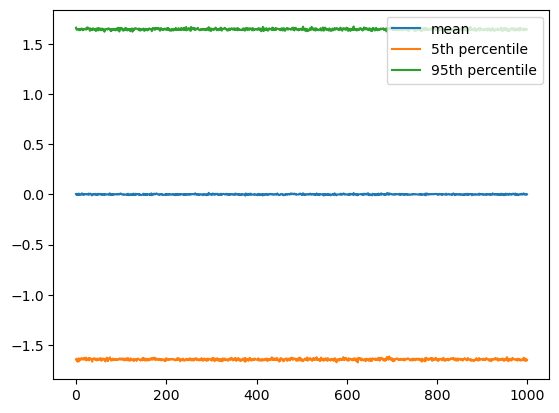

In [7]:
""" Demonstrate multidimenional averaging. """

# create a fake time, lat, lon array
gridded_array_example = np.random.normal(size=(1000, 180, 360))

# calculate the mean, 5th percentile, and 95th percentile over the lat and lon axes
# this will leave us with a 1D array of length 1000
timeseries_mean = gridded_array_example.mean(axis=(1,2))
timeseries_low = np.percentile(gridded_array_example, 5, axis=(1,2))
timeseries_high = np.percentile(gridded_array_example, 95, axis=(1,2))




# plot the 'timeseries'
import matplotlib.pyplot as plt
plt.plot(timeseries_mean, label = 'mean')
plt.plot(timeseries_low, label = '5th percentile')
plt.plot(timeseries_high, label = '95th percentile')
plt.legend()
plt.show()

# Broadcasting

By default, all *operations* in numpy are element-wise: `+`, `-`, `*`, `/` are all done element-by-element.  This would nominally require the arrays to have the same shape in order to use the `+` operator on them: e.g., `A + B` where `A` and `B` are arrays with the same shape.  But numpy has concepts call `broadcasting` and `conformant arrays`.  Basically, `numpy` will automatically make an array the same shape as another if there is a sane way to do so; if the arrays are *conformant*.

Conformant arrays are either (1) arrays of the exact same shape, or (2) arrays that have the same *rank* (same number of axes) with one of the arrays having one or more axes of length 1.

For example, consider again the gridded dataset example from the above cell.  What if we have a timeseries of, say, 'correction factors' that we want to apply to each point in space, but the correction factors depend on time.  How would we do this?  By using the `numpy.newaxis` feature to make the arrays conformant.



gridded_array_example.shape = (1000, 180, 360)
correction_factors.shape = (1000,)
correction_factors_conformant.shape = (1000, 1, 1)


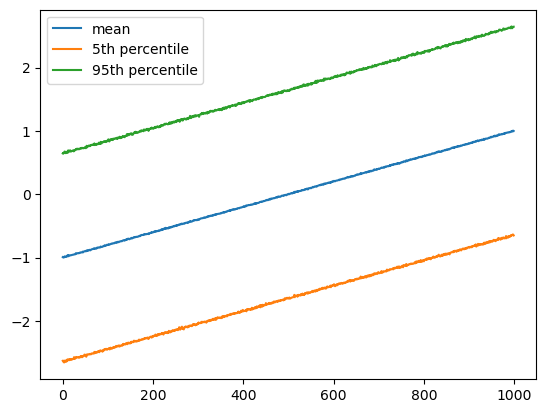

In [8]:
""" Demonstrate broadcasting """

# create a fake time, lat, lon array
gridded_array_example = np.random.normal(size=(1000, 180, 360))

# create a fake array of correction factors (make the data increase linearly with time)
correction_factors = np.linspace(-1,1,1000)

# show the shapes of the arrays
print(f"gridded_array_example.shape = {gridded_array_example.shape}")
print(f"correction_factors.shape = {correction_factors.shape}")

# create a conformant version of the correction factors array
# this is a 3D array, where each 2D slice is the same
correction_factors_conformant = correction_factors[:,np.newaxis,np.newaxis]

# show the shape of the conformant array
print(f"correction_factors_conformant.shape = {correction_factors_conformant.shape}")

# add the correction factors to the gridded array
gridded_array_corrected = gridded_array_example + correction_factors_conformant

# calculate the mean, 5th percentile, and 95th percentile over the lat and lon axes
# this will leave us with a 1D array of length 1000
timeseries_mean = gridded_array_corrected.mean(axis=(1,2))
timeseries_low = np.percentile(gridded_array_corrected, 5, axis=(1,2))
timeseries_high = np.percentile(gridded_array_corrected, 95, axis=(1,2))

# plot the 'timeseries'
plt.plot(timeseries_mean, label = 'mean')
plt.plot(timeseries_low, label = '5th percentile')
plt.plot(timeseries_high, label = '95th percentile')
plt.legend()
plt.show()